# Final Project

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("./Dataset/WLASL_v0.3.json") as f:
    wlasl_data = json.load(f)


data = []
for entry in wlasl_data:
    gloss = entry["gloss"]
    for instance in entry["instances"]:
        data.append({
            "video_id": instance["video_id"],
            "gloss": gloss,
            "split": instance["split"],  # train/val/test
            "fps": instance["fps"],
            "frame_start": instance["frame_start"],
            "frame_end": instance["frame_end"],
            "bbox": instance.get("bbox", None),  # Optional
            "signer_id": instance.get("signer_id", None),
            "source": instance["source"],
            "url": instance["url"],
            "variation_id": instance["variation_id"],
        })

df_wlasl = pd.DataFrame(data)

print(f'Total instances: {len(df_wlasl)}')
df_wlasl.head()


Total instances: 21083


,video_id,gloss,split,fps,frame_start,frame_end,bbox,signer_id,source,url,variation_id
0,69241,book,train,25,1,-1,"[385, 37, 885, 720]",118,aslbrick,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,65225,book,train,25,1,-1,"[190, 25, 489, 370]",90,aslsignbank,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,68011,book,train,25,1,-1,"[262, 1, 652, 480]",110,valencia-asl,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,68208,book,train,25,1,60,"[123, 19, 516, 358]",113,lillybauer,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,68012,book,train,25,1,-1,"[95, 0, 1180, 720]",109,valencia-asl,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [13]:
with open("./Dataset/missing.txt", 'r') as f:
    missing_ids = set(f.read().splitlines())

df_wlasl = df_wlasl[~df_wlasl["video_id"].isin(missing_ids)]
print(f"Remaining Filtered Instances: {len(df_wlasl)}")
df_wlasl.head()

Remaining Filtered Instances: 11980


,video_id,gloss,split,fps,frame_start,frame_end,bbox,signer_id,source,url,variation_id
0,69241,book,train,25,1,-1,"[385, 37, 885, 720]",118,aslbrick,http://aslbricks.org/New/ASL-Videos/book.mp4,0
10,07069,book,train,25,1,-1,"[462, 44, 949, 720]",31,signschool,https://signstock.blob.core.windows.net/signsc...,0
17,07068,book,train,25,1,-1,"[234, 17, 524, 414]",36,startasl,https://s3-us-west-1.amazonaws.com/files.start...,0
22,07070,book,train,25,1,-1,"[131, 26, 526, 480]",59,asldeafined,https://media.asldeafined.com/vocabulary/14666...,0
24,07099,book,val,25,1,-1,"[162, 54, 528, 400]",12,aslsearch,http://www.aslsearch.com/signs/videos/book.mp4,0


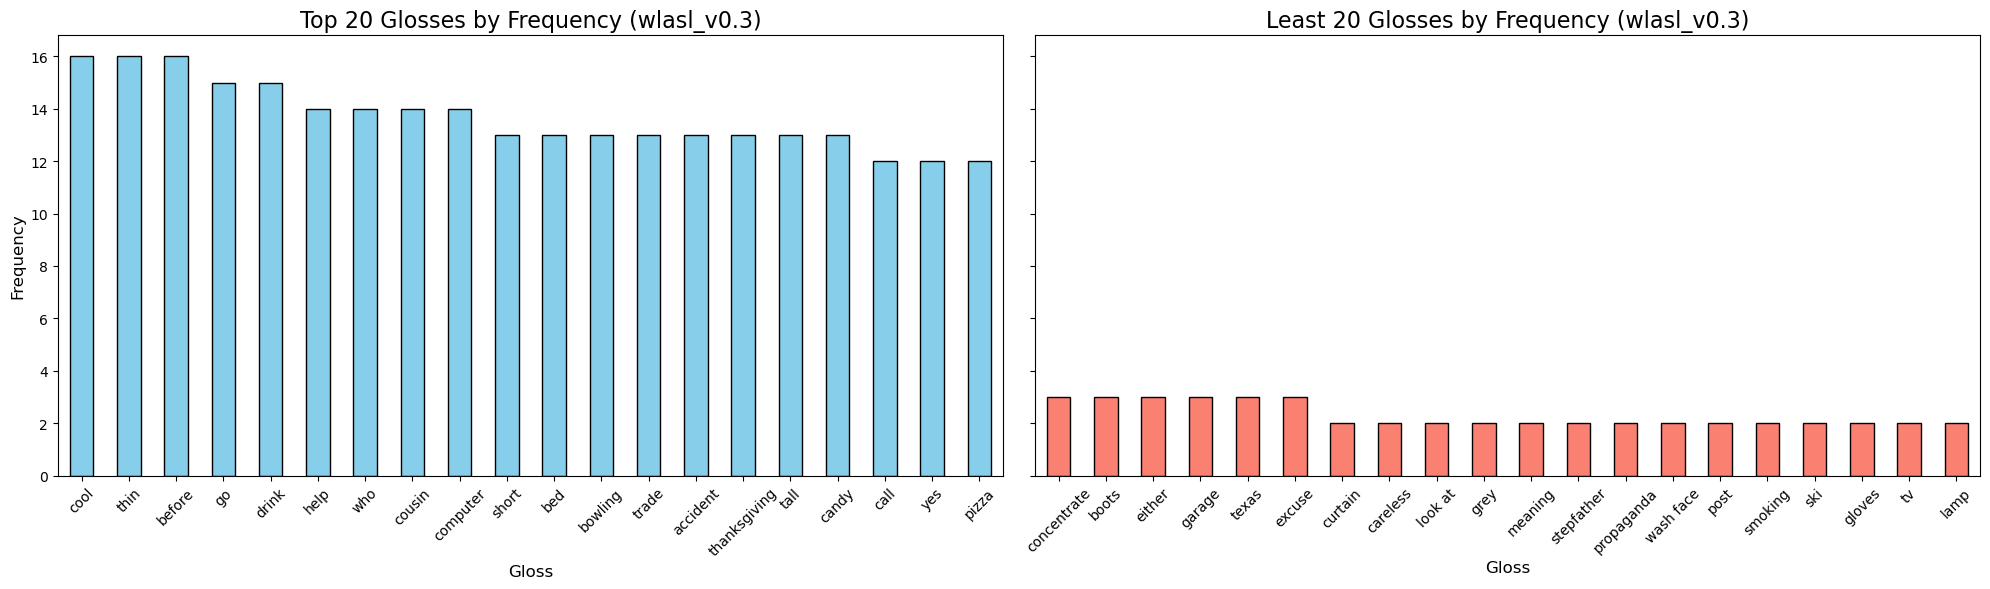

In [5]:
# Compute gloss frequency counts
gloss_counts = df_wlasl["gloss"].value_counts()

# Sort gloss frequencies
gloss_counts_sorted = gloss_counts.sort_values(ascending=False)

# Create subplots for top 20 and least 20 glosses
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot top 20 glosses
gloss_counts_sorted.head(20).plot(
    kind="bar", color="skyblue", edgecolor="black", ax=axes[0]
)
axes[0].set_title("Top 20 Glosses by Frequency (wlasl_v0.3)", fontsize=16)
axes[0].set_xlabel("Gloss", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

# Plot least 20 glosses
gloss_counts_sorted.tail(20).plot(
    kind="bar", color="salmon", edgecolor="black", ax=axes[1]
)
axes[1].set_title("Least 20 Glosses by Frequency (wlasl_v0.3)", fontsize=16)
axes[1].set_xlabel("Gloss", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


split
train    8313
val      2253
test     1414
Name: count, dtype: int64


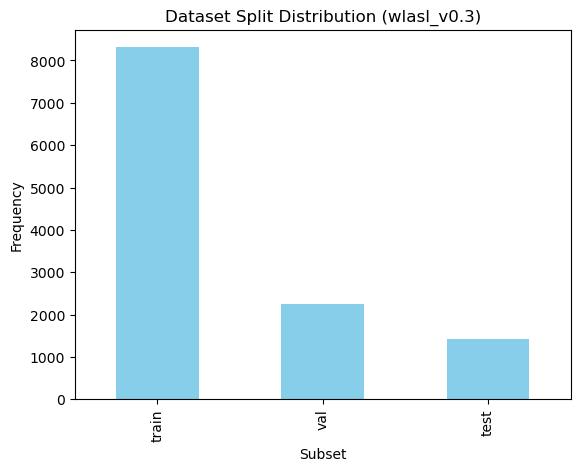

In [6]:
# Split distribution
subset_counts = df_wlasl["split"].value_counts()
print(subset_counts)

# Plot split distribution
subset_counts.plot(kind="bar", color="skyblue")
plt.title("Dataset Split Distribution (wlasl_v0.3)")
plt.xlabel("Subset")
plt.ylabel("Frequency")
plt.show()


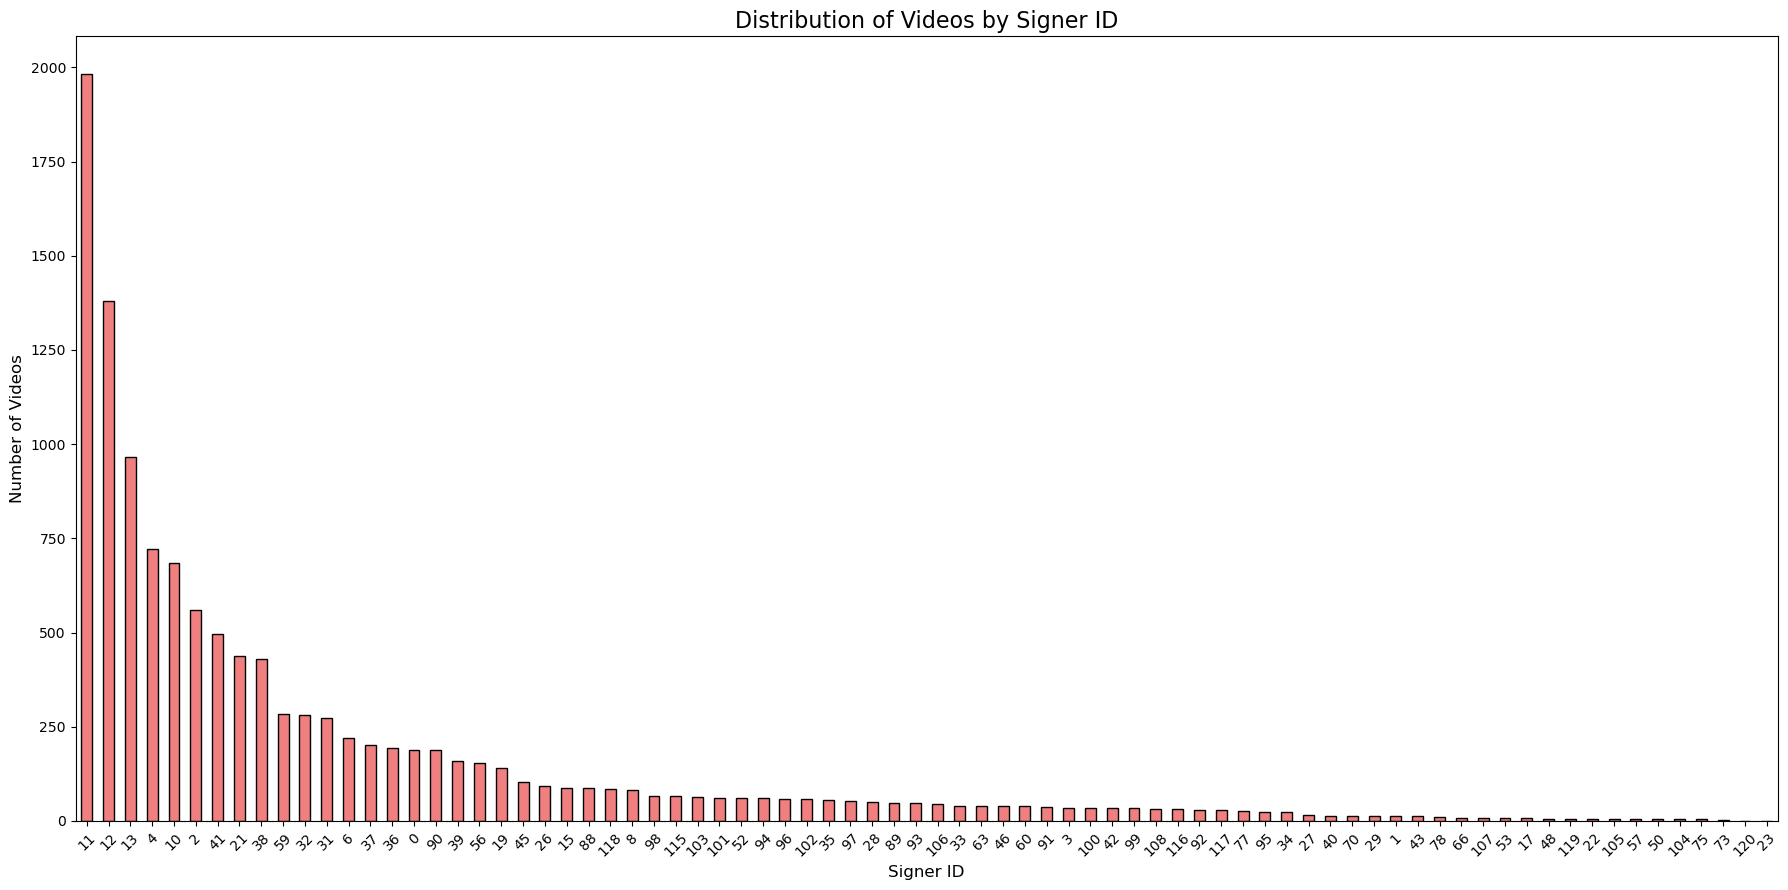

In [18]:
# Count the number of videos per signer
signer_counts = df_wlasl["signer_id"].value_counts()

# Plot the distribution
plt.figure(figsize=(18, 9))
signer_counts.plot(kind="bar", color="lightcoral", edgecolor="black")

# Improve plot aesthetics
plt.title("Distribution of Videos by Signer ID", fontsize=16)
plt.xlabel("Signer ID", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

source
signingsavvy     2668
signschool       1968
aslsearch        1875
asldeafined      1833
spreadthesign    1584
aslsignbank      1050
startasl          623
aslbrick          218
elementalasl      161
Name: count, dtype: int64


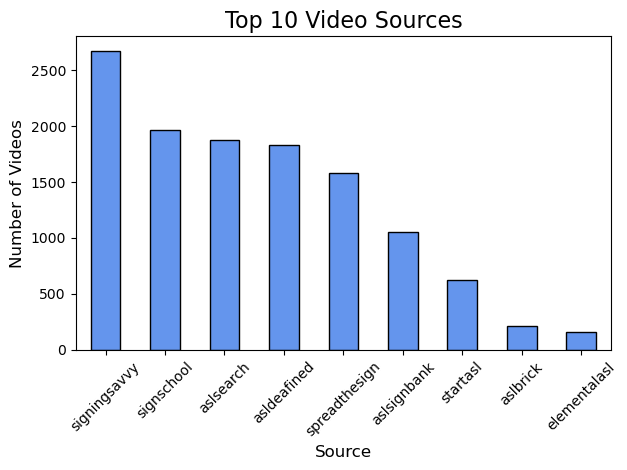

In [19]:
source_counts = df_wlasl["source"].value_counts()
print(source_counts)

# Plot top 10 sources
source_counts.head(10).plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 10 Video Sources", fontsize=16)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Number of Videos", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Bounding Box Width: 403.5108514190317
Average Bounding Box Height: 430.0003338898164
count    11980.000000
mean         0.922376
std          0.155050
min          0.532039
25%          0.812746
50%          0.906250
75%          1.026188
max          1.858333
Name: bbox_aspect_ratio, dtype: float64


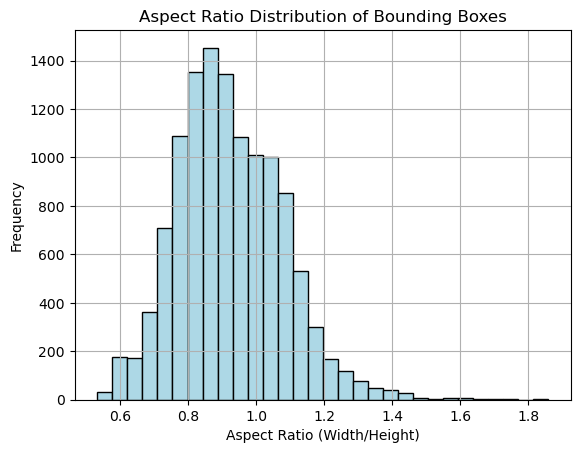

In [29]:


# Filter out entries without bounding boxes
df_with_bbox = df_wlasl[df_wlasl["bbox"].notnull()]

# Extract width and height for each bounding box
df_with_bbox["bbox_width"] = df_with_bbox["bbox"].apply(lambda bbox: bbox[2] - bbox[0])
df_with_bbox["bbox_height"] = df_with_bbox["bbox"].apply(lambda bbox: bbox[3] - bbox[1])

# Calculate average width and height
avg_width = np.mean(df_with_bbox["bbox_width"])
avg_height = np.mean(df_with_bbox["bbox_height"])

print(f"Average Bounding Box Width: {avg_width}")
print(f"Average Bounding Box Height: {avg_height}")



df_wlasl["bbox_aspect_ratio"] = df_wlasl["bbox"].apply(
    lambda bbox: (bbox[2] - bbox[0]) / (bbox[3] - bbox[1]) if bbox else None
)
print(df_wlasl["bbox_aspect_ratio"].describe())


df_wlasl["bbox_aspect_ratio"].dropna().hist(bins=30, color="lightblue", edgecolor="black")
plt.title("Aspect Ratio Distribution of Bounding Boxes")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.show()



In [32]:
# Count rows where frame_end == -1
count_frame_end_negative_one = (df_wlasl["frame_end"] == -1).sum()

print(f"Number of instances with frame_end = -1: {count_frame_end_negative_one}")

# Count rows where frame_end == -1
count_frame_start__one = (df_wlasl["frame_start"] == 1).sum()
print(f"Number of instances with frame_start = 1: {count_frame_start__one}")

# # Filter rows where frame_start is not 1
# non_starting_frames = df_wlasl[df_wlasl["frame_start"] != 1]

# # Display results
# print(f"Number of instances with frame_start != 1: {len(non_starting_frames)}")
# print(non_starting_frames)



Number of instances with frame_end = -1: 11980
Number of instances with frame_start = 1: 11978


In [16]:
# Count rows where frame_end == -1
var_id_is_not_zero = (df_wlasl["variation_id"] != 0).sum()

print(f"Number of instances with variation id is not 0: {var_id_is_not_zero }")

Number of instances with variation id is not 0: 644


In [ ]:
variation_counts = df_wlasl.groupby("gloss")["variation_id"].nunique()
print(variation_counts.head(10))  # Show first 10 glosses
####

gloss
a             1
a lot         1
abdomen       1
able          1
about         1
above         1
accent        1
accept        1
accident      2
accomplish    1
Name: variation_id, dtype: int64


In [22]:
most_varied_gloss = variation_counts.idxmax()
print(f"Gloss with most variations: {most_varied_gloss}")


Gloss with most variations: computer
